In [1]:
import asyncio
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

from dhanhq import dhanhq
from dhanhq.fulldepth import FullDepth

from data_from_dhan_util import DhanContext, MarketRecorder, RingBuffer

In [ ]:
# Credentials
client_id = "2512222680"
access_token = "....."

dhan_ctx = DhanContext(client_id, access_token)
dhan = dhanhq(client_id, access_token)

In [4]:
import pandas as pd

url = "https://images.dhan.co/api-data/api-scrip-master.csv"
df = pd.read_csv(url)


C:\Users\akhil\AppData\Local\Temp\ipykernel_9644\1842361700.py:4: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [29]:
df[(df['SEM_TRADING_SYMBOL'].str.contains('NIFTY-Mar2026-FUT'))]

,SEM_EXM_EXCH_ID,SEM_SEGMENT,SEM_SMST_SECURITY_ID,SEM_INSTRUMENT_NAME,SEM_EXPIRY_CODE,SEM_TRADING_SYMBOL,SEM_LOT_UNITS,SEM_CUSTOM_SYMBOL,SEM_EXPIRY_DATE,SEM_STRIKE_PRICE,SEM_OPTION_TYPE,SEM_TICK_SIZE,SEM_EXPIRY_FLAG,SEM_EXCH_INSTRUMENT_TYPE,SEM_SERIES,SM_SYMBOL_NAME
188495,NSE,D,51701,FUTIDX,0,BANKNIFTY-Mar2026-FUT,30.0,BANKNIFTY MAR FUT,2026-03-30 14:30:00,-0.01,XX,20.0,M,FUT,NaN,NaN
188506,NSE,D,51712,FUTIDX,0,FINNIFTY-Mar2026-FUT,60.0,FINNIFTY MAR FUT,2026-03-30 14:30:00,-0.01,XX,10.0,M,FUT,NaN,NaN
188507,NSE,D,51713,FUTIDX,0,MIDCPNIFTY-Mar2026-FUT,120.0,MIDCPNIFTY MAR FUT,2026-03-30 14:30:00,-0.01,XX,5.0,M,FUT,NaN,NaN
188508,NSE,D,51714,FUTIDX,0,NIFTY-Mar2026-FUT,65.0,NIFTY MAR FUT,2026-03-30 14:30:00,-0.01,XX,10.0,M,FUT,NaN,NaN


In [30]:
DTYPE = np.dtype([
    ("ts", "float64"),
    ("security_id", "U20"),
    ("side", "U3"),
    ("price", "float64"),
    ("qty", "int32")
])


In [31]:
# NIFTY futures example (adjust tokens properly)
instruments = [
    (2, "51714")   # NSE_FNO token
]

fd = FullDepth(dhan_ctx, instruments)
recorder = MarketRecorder(fd)


market_data/
 └── NIFTY_FUT/
     ├── 2026-02-15/
     │   ├── 09_15.parquet
     │   ├── 09_20.parquet
     │   └── ...

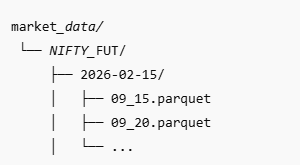

In [32]:
# Jupyter already has an event loop
task = asyncio.create_task(recorder.run())

{'RequestCode': 23, 'InstrumentCount': 1, 'InstrumentList': [{'ExchangeSegment': 'NSE_FNO', 'SecurityId': '51714'}]}


In [ ]:
task.cancel()